In [343]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [346]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [348]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [349]:
import pandas as pd
from scipy import stats

In [350]:
from scipy.stats import chi2_contingency

In [351]:
import matplotlib.pyplot as plt

In [352]:
import seaborn as sns

In [353]:
bias = pd.read_csv('C:/Users/elean/Downloads/Risk_of_Bias.csv')

In [354]:
bias.head()

,Study ID,Study Class,Treatment Focus,Total N Randomized (Study level),Selection Bias: Randomization Adequate,Selection Bias: Allocation Concealment Adequate,Selection Bias: Groups Similar at Baseline,Selection Bias: ITT Analysis,Performance Bias: Care Providers Masked,Performance Bias: Patients Masked,...,Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Female Percent Detail (Study level),Male Percent (Study level),Trauma Type (Study level),Trauma Detail (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository
0,acarturk2016,Psychotherapy,PTSD,98,Yes,Yes,Unclear,Yes,No,No,...,NaN,1.0,0.7449,NaN,0.2551,Terrorism/political violence/forced displacement,NaN,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019
1,acierno2017,Psychotherapy,PTSD,150,Yes,Yes,Yes,No,No,No,...,1.0,NaN,0.0379,NaN,0.9621,Combat-related,NaN,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019
2,adenauer2011,Psychotherapy,PTSD,34,Yes,Unclear,No,Yes,No,No,...,NaN,1.0,0.4412,NaN,0.5588,Terrorism/political violence/forced displacement,NaN,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019
3,ahmadi2015,Mixed: Psychotherapy & CIH,PTSD,48,Unclear,Unclear,Yes,No,No,No,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
4,ahmadizadeh2018,Nonpharmacologic biological,PTSD,65,Unclear,Unclear,Yes,Yes,No,Yes,...,1.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019


In [355]:
bias.mean()

Total N Randomized (Study level)          82.966581
Attrition Overall Greater Than 20%         0.315994
Active Duty Military (Study level)         0.094748
Veteran Percent (Study level)              0.723692
Community Percent (Study level)            0.608769
Female Percent (Study level)               0.460399
Male Percent (Study level)                 0.539886
PTSDPubs ID                           100595.570248
Year Added to PTSD-Repository           2019.226221
dtype: float64

In [356]:
bias.columns

Index(['Study ID', 'Study Class', 'Treatment Focus',
       'Total N Randomized (Study level)',
       'Selection Bias: Randomization Adequate',
       'Selection Bias: Allocation Concealment Adequate',
       'Selection Bias: Groups Similar at Baseline',
       'Selection Bias: ITT Analysis',
       'Performance Bias: Care Providers Masked',
       'Performance Bias: Patients Masked',
       'Detection Bias: Outcome Assessors Masked',
       'Attrition Overall Less Than or Equal to 20%',
       'Attrition Overall Greater Than 20%',
       'Attrition Differential Less Than or Equal to 15%',
       'Attrition Differential Greater Than 15%',
       'Additional Quantitative Data Reported',
       'Reporting Bias: All Prespecified Outcomes Reported',
       'Reporting Bias: Method of Handling Dropouts',
       'Reporting Bias: Detail of Other Methods of Handling Dropouts',
       'Outcome Measures Equal Valid and Reliable',
       'Study Reports Adequate Treatment Fidelity Based on Measure

# Recode & Rename

In [359]:
def male_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [360]:
bias['Male_recode'] = bias['Male Percent (Study level)'].apply(male_recode)

In [361]:
bias['Male_recode'].value_counts(dropna=False)

3    166
0     97
1     83
2     43
Name: Male_recode, dtype: int64

In [362]:
def fem_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [363]:
bias['Female_recode'] = bias['Female Percent (Study level)'].apply(fem_recode)

In [364]:
bias1 =bias[['Female Percent (Study level)', 'Male Percent (Study level)']].dropna()

In [365]:
bias['Female_recode'].value_counts(dropna=False)

0    141
3    124
2     81
1     43
Name: Female_recode, dtype: int64

In [366]:
def Vetern_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [367]:
bias['Veteran_recode'] = bias['Veteran Percent (Study level)'].apply(Vetern_recode)

In [368]:
bias['Veteran_recode'].value_counts(dropna=False)

3    332
0     46
1      7
2      4
Name: Veteran_recode, dtype: int64

In [369]:
def Military_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [370]:
bias2 =bias[['Active Duty Military (Study level)', ]].dropna()

In [371]:
bias['Military_recode'] = bias['Active Duty Military (Study level)'].apply(Military_recode)

In [372]:
bias['Military_recode'].value_counts(dropna=False)

3    234
0    151
1      2
2      2
Name: Military_recode, dtype: int64

In [373]:
def trauma_recode (series):
    if pd.isnull(series):
        return 0
    else:
        return 1
    

In [374]:
bias2 =bias[['Trauma Detail (Study level)',]].dropna()

In [375]:
bias['trauma_recode'] = bias['Trauma Detail (Study level)'].apply(trauma_recode)

In [376]:
bias['Trauma Detail (Study level)']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
384                                                  NaN
385       rape/sexual assault, community/school violence
386    combat-related, child physical abuse, child se...
387         combat-related, accidents, other (captivity)
388                                                  NaN
Name: Trauma Detail (Study level), Length: 389, dtype: object

In [377]:
bias['Trauma Detail (Study level)'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                 190
accidents, community/school violence                                                                                                                                                                                                  4
combat-related, other (not specified)                                                                                                                                                                                                 4
rape/sexual assault, community/school violence                                                                                                                                                                                        3
rape/sexual assault, accidents, community/school violence               

In [378]:
bias['Risk of Bias Rating']

0      Medium
1      Medium
2        High
3        High
4      Medium
        ...  
384      High
385      High
386    Medium
387    Medium
388      High
Name: Risk of Bias Rating, Length: 389, dtype: object

In [379]:
bias.head()

,Study ID,Study Class,Treatment Focus,Total N Randomized (Study level),Selection Bias: Randomization Adequate,Selection Bias: Allocation Concealment Adequate,Selection Bias: Groups Similar at Baseline,Selection Bias: ITT Analysis,Performance Bias: Care Providers Masked,Performance Bias: Patients Masked,...,Trauma Type (Study level),Trauma Detail (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository,Male_recode,Female_recode,Veteran_recode,Military_recode,trauma_recode
0,acarturk2016,Psychotherapy,PTSD,98,Yes,Yes,Unclear,Yes,No,No,...,Terrorism/political violence/forced displacement,NaN,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019,1,2,3,3,0
1,acierno2017,Psychotherapy,PTSD,150,Yes,Yes,Yes,No,No,No,...,Combat-related,NaN,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019,3,0,3,3,0
2,adenauer2011,Psychotherapy,PTSD,34,Yes,Unclear,No,Yes,No,No,...,Terrorism/political violence/forced displacement,NaN,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019,2,1,3,3,0
3,ahmadi2015,Mixed: Psychotherapy & CIH,PTSD,48,Unclear,Unclear,Yes,No,No,No,...,Combat-related,NaN,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019,3,0,0,3,0
4,ahmadizadeh2018,Nonpharmacologic biological,PTSD,65,Unclear,Unclear,Yes,Yes,No,Yes,...,Combat-related,NaN,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019,3,0,3,0,0


In [380]:
bias['Trauma Detail (Study level)'].unique() 

array([nan,
       'combat-related, accidents, natural or manmade disasters, other (not specified)',
       'intimate partner violence, accidents, illness/medical procedure',
       'rape/sexual assault, accidents, community/school violence, other (witnessing trauma of others, unspecified childhood trauma)',
       'rape/sexual assault, accidents, community/school violence',
       'Combat-related, Rape/sexual assault, Accidents, Community/school violence, Natural or manmade disasters, Terrorism/policital violence/forced displacement; Other (physical assault, assault with a weapon, unwanted or uncomfortable sexual experience, captivity, severe human suffering, sudden violent death of someone close, sudden unexpected death of someone close, other very stressful event or experience)',
       'combat-related, rape/sexual assault, accidents, community/school violence, natural or manmade disasters, other (not specified)',
       'combat-related, other ("civilian related trauma")',
       'c

In [381]:
def trauma_recode (series):
    if pd.isnull(series):
        return 0
    else:
        return 1
    
   
    

In [382]:
bias['Trauma Detail (Study level)'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                 190
accidents, community/school violence                                                                                                                                                                                                  4
combat-related, other (not specified)                                                                                                                                                                                                 4
rape/sexual assault, community/school violence                                                                                                                                                                                        3
rape/sexual assault, accidents, community/school violence               

In [383]:
bias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 40 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Study ID                                                                               389 non-null    object 
 1   Study Class                                                                            389 non-null    object 
 2   Treatment Focus                                                                        389 non-null    object 
 3   Total N Randomized (Study level)                                                       389 non-null    int64  
 4   Selection Bias: Randomization Adequate                                                 389 non-null    object 
 5   Selection Bias: Allocation Concealment Adequate                               

# corrlation 

In [384]:
bias['Female Percent (Study level)'].corr(bias['Male Percent (Study level)'])       

-0.9998917477816226

In [329]:
bias.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Total N Randomized (Study level),Attrition Overall Greater Than 20%,Active Duty Military (Study level),Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Male Percent (Study level),PTSDPubs ID,Year Added to PTSD-Repository,Male_recode,Female_recode,Veteran_recode,Military_recode,trauma_recode
Total N Randomized (Study level),1.0,0.022,0.11,-0.063,-0.052,-0.049,0.049,-0.077,0.14,0.058,-0.085,-0.059,0.028,0.042
Attrition Overall Greater Than 20%,0.022,1.0,0.11,-0.11,-0.0018,-0.024,0.025,0.022,-0.03,0.00092,-0.036,-0.06,0.0099,0.12
Active Duty Military (Study level),0.11,0.11,1.0,-0.52,-0.16,-0.15,0.15,-0.051,-0.1,0.17,-0.15,-0.51,1.0,-0.09
Veteran Percent (Study level),-0.063,-0.11,-0.52,1.0,-0.78,-0.53,0.53,-0.0003,-0.34,0.51,-0.38,1.0,-0.32,-0.23
Community Percent (Study level),-0.052,-0.0018,-0.16,-0.78,1.0,0.74,-0.74,0.074,-0.16,-0.69,0.66,-0.038,0.69,0.35
Female Percent (Study level),-0.049,-0.024,-0.15,-0.53,0.74,1.0,-1.0,0.095,-0.058,-0.97,0.97,-0.036,0.46,0.3
Male Percent (Study level),0.049,0.025,0.15,0.53,-0.74,-1.0,1.0,-0.095,0.059,0.97,-0.97,0.036,-0.46,-0.3
PTSDPubs ID,-0.077,0.022,-0.051,-0.0003,0.074,0.095,-0.095,1.0,0.027,-0.059,0.091,0.03,0.04,-0.049
Year Added to PTSD-Repository,0.14,-0.03,-0.1,-0.34,-0.16,-0.058,0.059,0.027,1.0,0.07,-0.07,-0.38,-0.4,0.012
Male_recode,0.058,0.00092,0.17,0.51,-0.69,-0.97,0.97,-0.059,0.07,1.0,-0.83,0.034,-0.42,-0.29


# histogram 

(array([141.,   0.,   0.,  43.,   0.,   0.,  81.,   0.,   0., 124.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

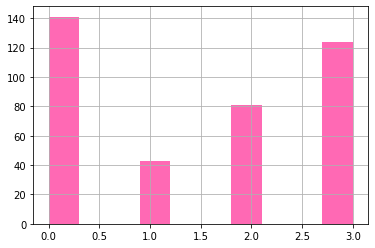

In [386]:
bias['Female_recode'].hist()
plt.hist(bias['Female_recode'], facecolor='hotpink')


(array([ 97.,   0.,   0.,  83.,   0.,   0.,  43.,   0.,   0., 166.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

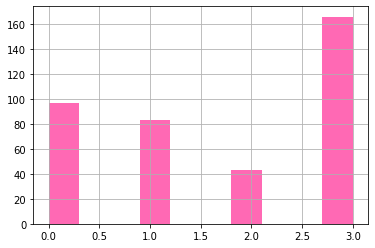

In [387]:
bias['Male_recode'].hist()
plt.hist(bias['Male_recode'], facecolor='hotpink')

(array([235.,   0.,   0.,   0.,   0., 132.,   0.,   0.,   0.,  22.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

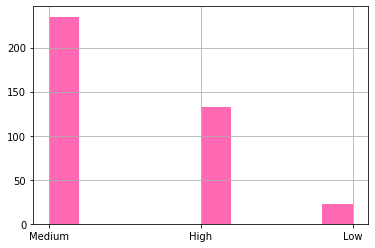

In [388]:
bias['Risk of Bias Rating'].hist()
plt.hist(bias['Risk of Bias Rating'], facecolor='hotpink')

(array([151.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

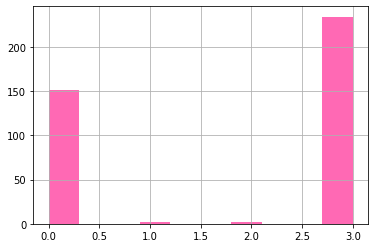

In [389]:
bias['Military_recode'].hist()
plt.hist(bias['Military_recode'], facecolor='hotpink')

(array([ 46.,   0.,   0.,   7.,   0.,   0.,   4.,   0.,   0., 332.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

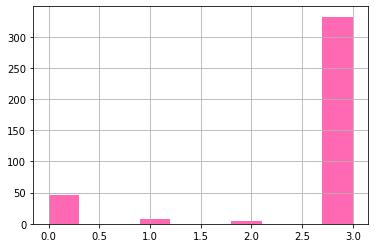

In [335]:
bias['Veteran_recode'].hist()
plt.hist(bias['Veteran_recode'], facecolor='hotpink')

In [471]:
bias.columns

Index(['Study ID', 'Study Class', 'Treatment Focus',
       'Total N Randomized (Study level)',
       'Selection Bias: Randomization Adequate',
       'Selection Bias: Allocation Concealment Adequate',
       'Selection Bias: Groups Similar at Baseline',
       'Selection Bias: ITT Analysis',
       'Performance Bias: Care Providers Masked',
       'Performance Bias: Patients Masked',
       'Detection Bias: Outcome Assessors Masked',
       'Attrition Overall Less Than or Equal to 20%',
       'Attrition Overall Greater Than 20%',
       'Attrition Differential Less Than or Equal to 15%',
       'Attrition Differential Greater Than 15%',
       'Additional Quantitative Data Reported',
       'Reporting Bias: All Prespecified Outcomes Reported',
       'Reporting Bias: Method of Handling Dropouts',
       'Reporting Bias: Detail of Other Methods of Handling Dropouts',
       'Outcome Measures Equal Valid and Reliable',
       'Study Reports Adequate Treatment Fidelity Based on Measure

# ttest

In [472]:
stats.ttest_1samp(bias['Female_recode'], 15)

Ttest_1sampResult(statistic=-209.69057588230226, pvalue=0.0)

In [473]:
stats.ttest_1samp(bias['Male_recode'], 15)

Ttest_1sampResult(statistic=-209.78224634437905, pvalue=0.0)

In [475]:
ttest_ind(bias['Female_recode'], bias['Male_recode'])

Ttest_indResult(statistic=-2.5603289632828967, pvalue=0.010645532321528605)

# crosstab

In [393]:
bias_crosstab1 = pd.crosstab(bias['Female_recode'], bias['Male_recode'])
bias_crosstab

Female_recode,0,1,2,3
Risk of Bias Rating,,,,
High,46,17,21,48
Low,14,1,4,3
Medium,81,25,56,73


In [394]:
bias_crosstab2 = pd.crosstab(bias['Risk of Bias Rating'], bias['Male_recode'])
bias_crosstab

Female_recode,0,1,2,3
Risk of Bias Rating,,,,
High,46,17,21,48
Low,14,1,4,3
Medium,81,25,56,73


In [395]:
bias_crosstab3 = pd.crosstab(bias['Risk of Bias Rating'], bias['Female_recode'])
bias_crosstab

Female_recode,0,1,2,3
Risk of Bias Rating,,,,
High,46,17,21,48
Low,14,1,4,3
Medium,81,25,56,73


# Bias Histogram

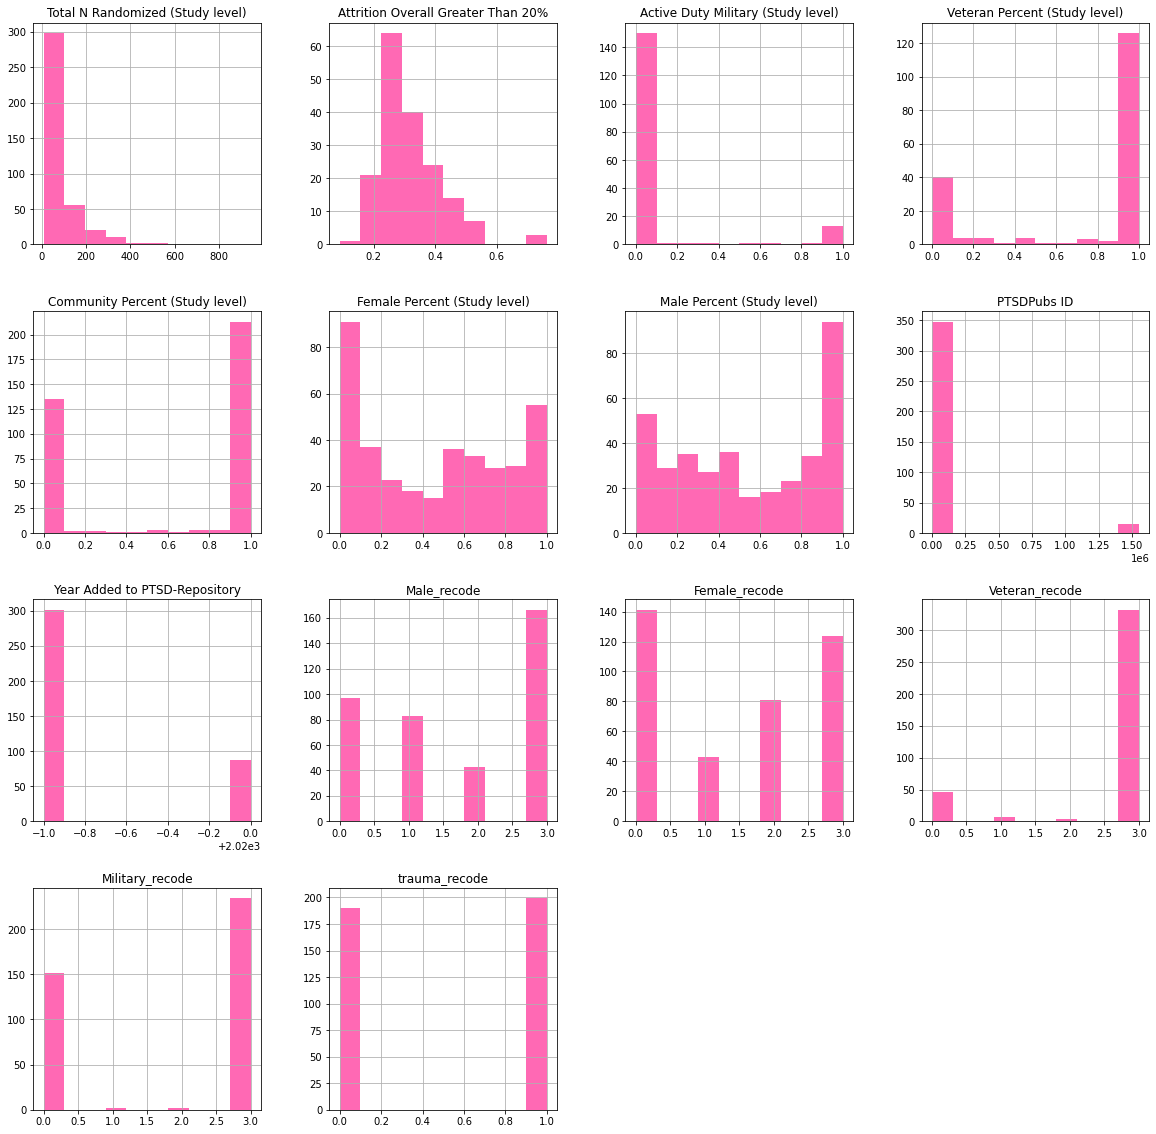

In [397]:

bias.hist(figsize= (20, 20), color = "hotpink")
plt.show()

In [408]:
h2=bias[['Risk of Bias Rating','Female_recode', 'Male_recode']]

# histogram

(array([ 97.,   0.,   0.,  83.,   0.,   0.,  43.,   0.,   0., 166.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

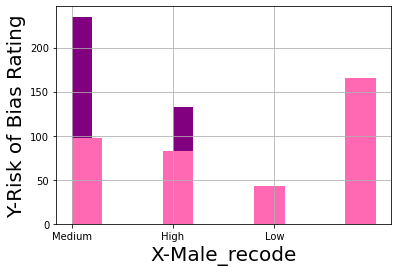

In [402]:
bias['Risk of Bias Rating'].hist()
p = sns.lineplot(dataSet = bias)
p.set_xlabel("X-Male_recode", fontsize = 20)
p.set_ylabel("Y-Risk of Bias Rating", fontsize = 20)
plt.hist(bias['Risk of Bias Rating'], facecolor='purple')
plt.hist(bias['Male_recode'], facecolor='hotpink')

(array([141.,   0.,   0.,  43.,   0.,   0.,  81.,   0.,   0., 124.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

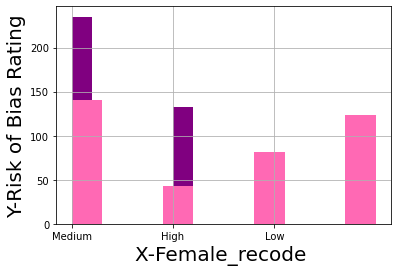

In [403]:
bias['Risk of Bias Rating'].hist()
p = sns.lineplot(dataSet = bias)
p.set_xlabel("X-Female_recode ", fontsize = 20)
p.set_ylabel("Y-Risk of Bias Rating", fontsize = 20)
plt.hist(bias['Risk of Bias Rating'], facecolor='purple')
plt.hist(bias['Female_recode'], facecolor='hotpink')

In [46]:
bias['Female Percent (Study level)'].unique()

array([0.7449, 0.0379, 0.4412, 0.    , 0.65  , 0.28  , 0.7857, 0.5294,
       0.6567, 0.875 , 0.091 , 0.193 , 0.8475, 0.871 , 0.0667, 0.1371,
          nan, 0.8182, 0.2143, 0.881 , 0.0556, 0.7347, 0.7   , 1.    ,
       0.0274, 0.8   , 0.733 , 0.457 , 0.79  , 0.507 , 0.5833, 0.52  ,
       0.9643, 0.5429, 0.23  , 0.4101, 0.6596, 0.9333, 0.0455, 0.6071,
       0.4365, 0.5625, 0.1017, 0.6744, 0.4603, 0.29  , 0.91  , 0.7308,
       0.7619, 0.7788, 0.541 , 0.66  , 0.0238, 0.0571, 0.0244, 0.162 ,
       0.34  , 0.0323, 0.825 , 0.806 , 0.24  , 0.4   , 0.3966, 0.5   ,
       0.5868, 0.098 , 0.309 , 0.1875, 0.1907, 0.556 , 0.4634, 0.7042,
       0.177 , 0.3455, 0.3944, 0.1202, 0.6515, 0.0339, 0.102 , 0.074 ,
       0.2282, 0.5714, 0.69  , 0.6522, 0.1207, 0.119 , 0.831 , 0.1915,
       0.9074, 0.0345, 0.1905, 0.139 , 0.2391, 0.1818, 0.1364, 0.36  ,
       0.5846, 0.2083, 0.6786, 0.2308, 0.823 , 0.9211, 0.11  , 0.6   ,
       0.8875, 0.3846, 0.5652, 0.62  , 0.2444, 0.2128, 0.1455, 0.0765,
      

In [51]:
bias['Male Percent (Study level)'].unique()

array([0.2551, 0.9621, 0.5588, 1.    , 0.35  , 0.72  , 0.2143, 0.4706,
       0.3433, 0.125 , 0.909 , 0.807 , 0.1525, 0.129 , 0.9333, 0.8629,
          nan, 0.1818, 0.7857, 0.119 , 0.9444, 0.2653, 0.3   , 0.    ,
       0.9726, 0.2   , 0.267 , 0.543 , 0.21  , 0.493 , 0.4167, 0.48  ,
       0.0357, 0.4571, 0.77  , 0.5899, 0.4404, 0.0667, 0.9545, 0.3929,
       0.5635, 0.4375, 0.8983, 0.3256, 0.5397, 0.71  , 0.09  , 0.2692,
       0.2381, 0.2212, 0.459 , 0.34  , 0.9762, 0.9429, 0.9756, 0.838 ,
       0.66  , 0.9677, 0.175 , 0.194 , 0.76  , 0.6   , 0.6034, 0.5   ,
       0.4132, 0.902 , 0.691 , 0.8125, 0.8093, 0.444 , 0.5366, 0.2958,
       0.823 , 0.6545, 0.6056, 0.8798, 0.3485, 0.9661, 0.898 , 0.926 ,
       0.7718, 0.4286, 0.31  , 0.3478, 0.8793, 0.881 , 0.169 , 0.8085,
       0.0926, 0.9655, 0.8095, 0.861 , 0.7609, 0.8182, 0.8636, 0.64  ,
       0.4154, 0.7917, 0.3214, 0.7692, 0.177 , 0.0789, 0.89  , 0.4   ,
       0.1125, 0.6154, 0.4348, 0.38  , 0.7556, 0.7872, 0.8545, 0.9235,
      

In [410]:
CrossTable = pd.crosstab(bias['Military_recode'], bias['Veteran_recode'])

In [411]:
bias['Military_recode'].unique()

array([3, 0, 2, 1], dtype=int64)

In [412]:
   bias['Veteran_recode'].unique()

array([3, 0, 2, 1], dtype=int64)

# Stacked Bar

<AxesSubplot:xlabel='Male_recode'>

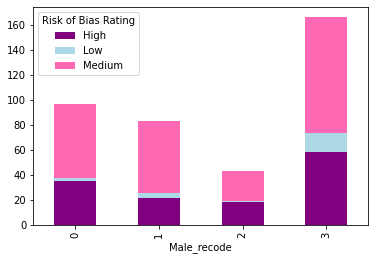

In [453]:
CrossTable2 = pd.crosstab(bias['Male_recode'], bias['Risk of Bias Rating'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'lightblue', 'hotpink'])

<AxesSubplot:xlabel='Male_recode'>

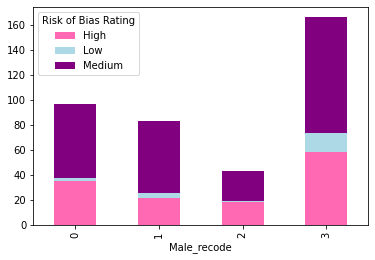

In [455]:
CrossTable3 = pd.crosstab(bias['Female_recode'], bias['Risk of Bias Rating'])
CrossTable.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Male_recode'>

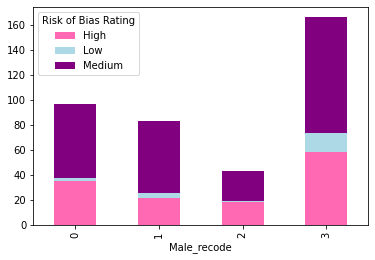

In [458]:
CrossTable = pd.crosstab(bias['Veteran_recode'],bias['trauma_recode'])
CrossTable2.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

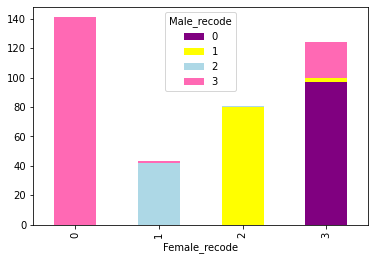

In [451]:
CrossTable1 = pd.crosstab(bias['Female_recode'], bias['Male_recode'])
CrossTable1.plot.bar(stacked=True, color=['purple', 'yellow','lightblue', 'hotpink'])

<AxesSubplot:xlabel='Male_recode'>

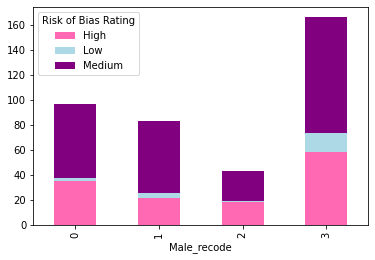

In [452]:
CrossTable = pd.crosstab(bias['Male_recode'], bias['Risk of Bias Rating'])
CrossTable.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

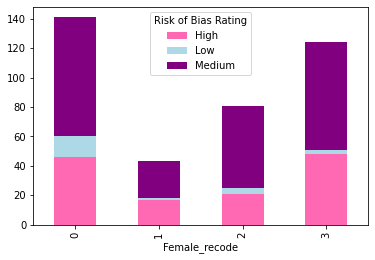

In [459]:
CrossTable = pd.crosstab(bias['Female_recode'], bias['Risk of Bias Rating'])
CrossTable.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

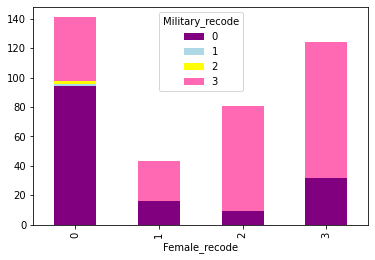

In [460]:
CrossTable = pd.crosstab(bias['Female_recode'], bias['Military_recode'])
CrossTable.plot.bar(stacked=True, color=['purple', 'lightblue', 'yellow', 'hotpink'])

<AxesSubplot:xlabel='Male_recode'>

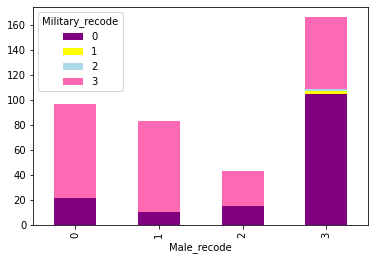

In [461]:
CrossTable = pd.crosstab(bias['Male_recode'],bias['Military_recode'])
CrossTable.plot.bar(stacked=True, color=['purple', 'yellow', 'lightblue', 'hotpink'])

In [418]:
CrossTable = pd.crosstab(bias['Veteran_recode'],bias['Military_recode'])
CrossTable.plot.bar(stacked=True, color=['purple', 'black', 'yellow', 'hotpink'])

<AxesSubplot:xlabel='Veteran_recode'>

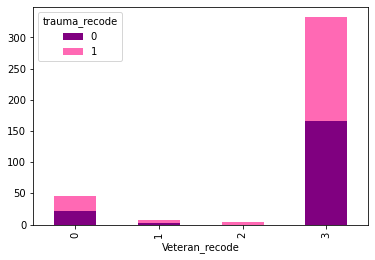

In [463]:
CrossTable2 = pd.crosstab(bias['Veteran_recode'],bias['trauma_recode'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'hotpink'])

<AxesSubplot:xlabel='trauma_recode'>

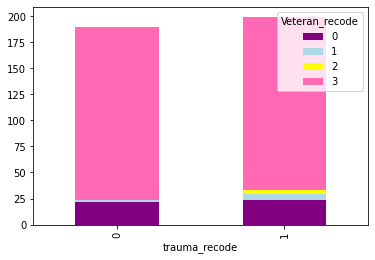

In [464]:
CrossTable2 = pd.crosstab(bias['trauma_recode'],bias['Veteran_recode'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'lightblue', 'yellow', 'hotpink'])

(array([151.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

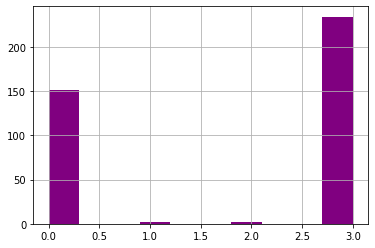

In [466]:
bias['Military_recode'].hist()
plt.hist(bias['Military_recode'], facecolor='purple')

# SCATTERPLOT

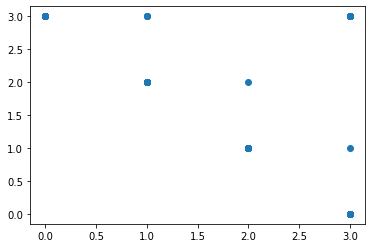

In [476]:
plt.scatter(x = bias['Male_recode'], y = bias['Female_recode'])

plt.show()

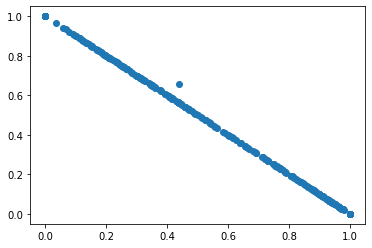

In [477]:
plt.scatter(x = bias['Male Percent (Study level)'], y = bias['Female Percent (Study level)'])

plt.show()

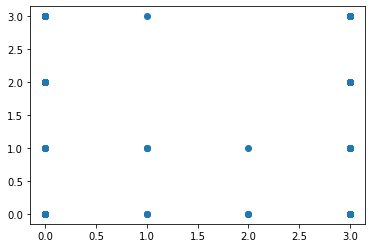

In [478]:
plt.scatter(x = bias ['Veteran_recode'], y =  bias ['Female_recode'])

plt.show()

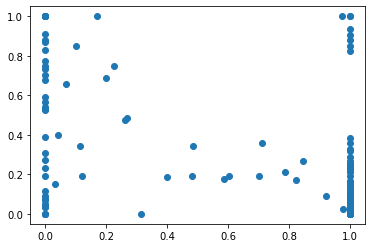

In [481]:
plt.scatter(x = bias ['Veteran Percent (Study level)'], y =  bias ['Female Percent (Study level)'])

plt.show()

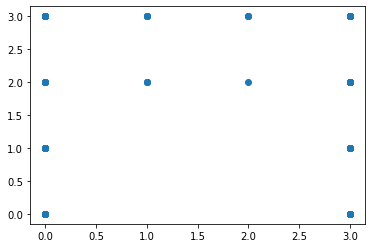

In [483]:
plt.scatter(x = bias ['Veteran_recode'], y =  bias ['Male_recode'])

plt.show()

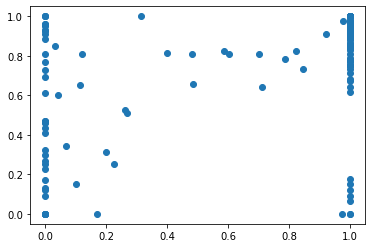

In [484]:
plt.scatter(x = bias ['Veteran Percent (Study level)'], y =  bias ['Male Percent (Study level)'])

plt.show()

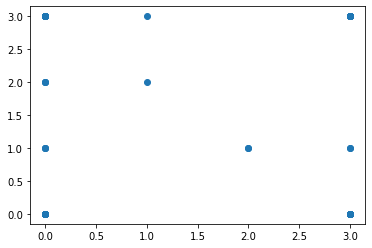

In [482]:
plt.scatter(x = bias ['Military_recode'],y = bias ['Veteran_recode'])

plt.show()

 # Chi 2

In [489]:
stat, p, dlf, expected = chi2_contingency(bias_crosstab)

In [490]:
print (stat)

11.910418073995602


In [491]:
print (p)

0.06399736576468158


In [492]:
significance_level = 0.05
print("p value:"+ str(p))
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value:0.06399736576468158
ACCEPT NULL HYPOTHESIS


C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Female_recode', ylabel='Density'>

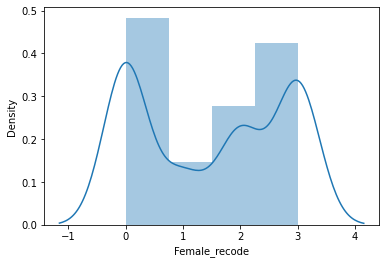

In [502]:
sns.distplot(bias['Female_recode'])


In [500]:
x = bias['Male_recode']
y = bias['Female_recode']
print (x, y)

0      1
1      3
2      2
3      3
4      3
      ..
384    0
385    0
386    1
387    0
388    2
Name: Male_recode, Length: 389, dtype: int64 0      2
1      0
2      1
3      0
4      0
      ..
384    3
385    3
386    2
387    3
388    1
Name: Female_recode, Length: 389, dtype: int64
